In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Allows plots to appear directly in the notebook.
%matplotlib inline

## Logistic Models

Model 1 - Logistic model using just the AvgNumWifiConn to predict BinaryEstimate (is the room occupied?)
        - Accuracy: 81%
        - Split into training and test:
            Training Set Accuacy: 83%
            Test Set Accuracy: 75%
Model 2 - Logistic model using the AvgNumWifiConn, Capacity and NumReg to predict BinaryEstimate
        - Split into training and test:
            Training Set Accuacy: 83.7%
            Test Set Accuracy: 72.7%
            
--> Adding more features makes test model less accurate - Capacity and NumReg arent relevant at all (can be confirmed by correlations) so shouldnt actually go in the model?

Model 3 - Logistic Model using all features (Avg Wifi, Capacity, NumReg, Room, Module, DateTime)
        - Split into training and test:
                Training Set Accuacy: 82.5%
                Test Set Accuracy: 90%
--> More Accurate!!

Model 4 - Logistic Model using features - Avg Wifi, Room, Module, DateTime (Capacity and NumReg removed as they brough the accuracy down in model 2
        - Split into training and test:
                Training Set Accuacy: 82.5%
                Test Set Accuracy: 77.2%
    

NORMALISED FEATURES

Model 5 - Logistic model using just the AvgNumWifiConn (Normalised) to predict BinaryEstimate
        - Accuracy: 72%
Model 6 - Logistic model using just the AvgNumWifiConn, Capacity and NumReg to predict BinaryEstimate (All features normaliesed)
        - Split into training and test:
            Training Set Accuacy: 75%
--> Models with normalised features not as strong
            

## Reading data

In [2]:
# Read csv file into a dataframe.
df = pd.read_csv('ABT-Avgs.csv')
df.head()

,DateTime,Room,Capacity,Module,NumReg,AvgNumWifiConn,PercentageEstimate,BinaryEstimate
0,2015-11-03 16:00:00,B-002,90,COMP40370P1,27,39.0000,0.25,1
1,2015-11-04 16:00:00,B-002,90,COMP30250P1,22,20.0000,0.25,1
2,2015-11-05 16:00:00,B-002,90,COMP30520P1,60,32.6667,0.00,0
3,2015-11-06 16:00:00,B-002,90,None,0,20.3333,0.50,1
4,2015-11-09 16:00:00,B-002,90,COMP40660P1,53,72.5000,0.25,1


In [3]:
# Print the feature types in our dataset.
df.dtypes

DateTime               object
Room                   object
Capacity                int64
Module                 object
NumReg                  int64
AvgNumWifiConn        float64
PercentageEstimate    float64
BinaryEstimate          int64
dtype: object

In [4]:
# Change datetime, Room and Module to type categorical
df['DateTime'] = df['DateTime'].astype('category')
df['Room'] = df['Room'].astype('category')
df['Module'] = df['Module'].astype('category')
df.dtypes

DateTime              category
Room                  category
Capacity                 int64
Module                category
NumReg                   int64
AvgNumWifiConn         float64
PercentageEstimate     float64
BinaryEstimate           int64
dtype: object

In [5]:
df['PercentageCategory'] = pd.Categorical.from_array(df.PercentageEstimate).codes
df['ModuleCategory'] = pd.Categorical.from_array(df.Module).codes
df['RoomCategory'] = pd.Categorical.from_array(df.Room).codes
df['DateTimeCategory'] = pd.Categorical.from_array(df.DateTime).codes
df

,DateTime,Room,Capacity,Module,NumReg,AvgNumWifiConn,PercentageEstimate,BinaryEstimate,PercentageCategory,ModuleCategory,RoomCategory,DateTimeCategory
0,2015-11-03 16:00:00,B-002,90,COMP40370P1,27,39.0000,0.25,1,1,32,0,7
1,2015-11-04 16:00:00,B-002,90,COMP30250P1,22,20.0000,0.25,1,1,27,0,15
2,2015-11-05 16:00:00,B-002,90,COMP30520P1,60,32.6667,0.00,0,0,30,0,23
3,2015-11-06 16:00:00,B-002,90,None,0,20.3333,0.50,1,2,51,0,31
4,2015-11-09 16:00:00,B-002,90,COMP40660P1,53,72.5000,0.25,1,1,34,0,39
5,2015-11-10 16:00:00,B-002,90,COMP40370P1,27,35.1667,0.25,1,1,32,0,47
6,2015-11-11 16:00:00,B-002,90,COMP30250P1,22,23.5000,0.25,1,1,27,0,55
7,2015-11-12 16:00:00,B-002,90,COMP30520P1,60,49.8333,0.25,1,1,30,0,63
8,2015-11-13 16:00:00,B-002,90,None,0,8.6667,0.25,1,1,51,0,71
9,2015-11-03 09:00:00,B-002,90,None,0,2.0000,0.00,0,0,51,0,0


## Understanding data

In [6]:
df.corr()

,Capacity,NumReg,AvgNumWifiConn,PercentageEstimate,BinaryEstimate,PercentageCategory,ModuleCategory,RoomCategory,DateTimeCategory
Capacity,1.000000,0.468271,0.355578,-0.045083,-0.056617,-0.045083,-0.131679,0.866025,0.000000
NumReg,0.468271,1.000000,0.736217,0.344868,0.290085,0.344868,-0.721154,0.342719,-0.020971
AvgNumWifiConn,0.355578,0.736217,1.000000,0.598574,0.454588,0.598574,-0.466589,0.336678,-0.085836
PercentageEstimate,-0.045083,0.344868,0.598574,1.000000,0.769572,1.000000,-0.312590,0.019522,-0.138564
BinaryEstimate,-0.056617,0.290085,0.454588,0.769572,1.000000,0.769572,-0.306541,-0.061289,-0.054659
PercentageCategory,-0.045083,0.344868,0.598574,1.000000,0.769572,1.000000,-0.312590,0.019522,-0.138564
ModuleCategory,-0.131679,-0.721154,-0.466589,-0.312590,-0.306541,-0.312590,1.000000,-0.083234,-0.003058
RoomCategory,0.866025,0.342719,0.336678,0.019522,-0.061289,0.019522,-0.083234,1.000000,0.000000
DateTimeCategory,0.000000,-0.020971,-0.085836,-0.138564,-0.054659,-0.138564,-0.003058,0.000000,1.000000


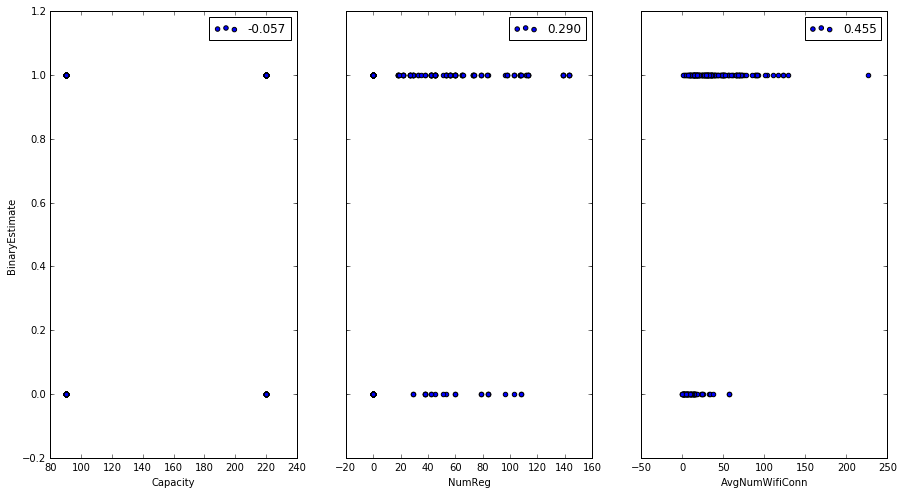

In [9]:
# Scatterplots for each descriptive feature and target feature. 
# Show the correlation value in the plot.
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='Capacity', y='BinaryEstimate', label="%.3f" % df[['Capacity', 'BinaryEstimate']].corr().as_matrix()[0,1], ax=axs[0], figsize=(15, 8))
df.plot(kind='scatter', x='NumReg', y='BinaryEstimate', label="%.3f" % df[['NumReg', 'BinaryEstimate']].corr().as_matrix()[0,1], ax=axs[1])
df.plot(kind='scatter', x='AvgNumWifiConn', y='BinaryEstimate', label="%.3f" % df[['AvgNumWifiConn', 'BinaryEstimate']].corr().as_matrix()[0,1], ax=axs[2])

## Multiple logistic regression (using more than one feature) using scikit learn
### Training the model


In [7]:
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

In [8]:
# Prepare an intercept term that adds a 1 to each example.
# Scikit-learn does not use an intercept by default.
intercept = pd.DataFrame({'Intercept': np.ones(len(df))})

In [54]:
# Prepare the descriptive features
X = pd.concat([intercept, df[['Capacity', 'NumReg', 'AvgNumWifiConn']]], axis=1)
y = df.BinaryEstimate
print("Descriptive features:\n", X)
print("\nTarget feature:\n", y)

Descriptive features:
      Intercept  Capacity  NumReg  AvgNumWifiConn
0          1.0        90      27         39.0000
1          1.0        90      22         20.0000
2          1.0        90      60         32.6667
3          1.0        90       0         20.3333
4          1.0        90      53         72.5000
5          1.0        90      27         35.1667
6          1.0        90      22         23.5000
7          1.0        90      60         49.8333
8          1.0        90       0          8.6667
9          1.0        90       0          2.0000
10         1.0        90      29         14.0000
11         1.0        90       0          2.1667
12         1.0        90      38          2.6667
13         1.0        90      29         14.8333
14         1.0        90       0          1.0000
15         1.0        90      29         12.8333
16         1.0        90       0          4.0000
17         1.0        90      38          6.5000
18         1.0        90      45         29.00

## Training the model

In [20]:
# Train a model using logistic regression from scikit-learn.
# Use only the descriptive feature AvgNumWifiConn.
logreg = LogisticRegression().fit(X[['Intercept', 'AvgNumWifiConn']], y)

In [23]:
# Examine the estimated logistic regression coefficients.
print("Coeficients: \n", logreg.coef_)

Coeficients: 
 [[-0.62163256  0.10149648]]


## Testing the model (using the model to make predictions)

In [25]:
# Predicted probabilities for each example. 
# The output is a pair for each example, 
# The first component is the probability of the negative class (class 0) - Room unoccupied.
# The second component is the probability of the positive class (class 1) - Room occupied.
logreg.predict_proba(X[['Intercept', 'AvgNumWifiConn']])

array([[  6.20883409e-02,   9.37911659e-01],
       [  3.12885325e-01,   6.87114675e-01],
       [  1.11819414e-01,   8.88180586e-01],
       [  3.05658971e-01,   6.94341029e-01],
       [  2.20409982e-03,   9.97795900e-01],
       [  8.89899011e-02,   9.11010099e-01],
       [  2.41971299e-01,   7.58028701e-01],
       [  2.15701361e-02,   9.78429864e-01],
       [  5.89917802e-01,   4.10082198e-01],
       [  7.38902516e-01,   2.61097484e-01],
       [  4.55695110e-01,   5.44304890e-01],
       [  7.35625149e-01,   2.64374851e-01],
       [  7.25638317e-01,   2.74361683e-01],
       [  4.34807593e-01,   5.65192407e-01],
       [  7.58004215e-01,   2.41995785e-01],
       [  4.85186926e-01,   5.14813074e-01],
       [  6.97891875e-01,   3.02108125e-01],
       [  6.41881094e-01,   3.58118906e-01],
       [  1.54447927e-01,   8.45552073e-01],
       [  4.51501699e-01,   5.48498301e-01],
       [  1.06877719e-01,   8.93122281e-01],
       [  7.08482938e-01,   2.91517062e-01],
       [  

In [26]:
# Predict using the trained model, on in-sample data (same sample used for training and test)
predictions = logreg.predict(X[['Intercept', 'AvgNumWifiConn']])
print("Predictions: ", predictions)

Predictions:  [1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0
 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1
 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0]


### ACCURACY

In [30]:
# Check the accuracy on the training set. 
# The accuracy is the ratio of correct predictions to total examples
logreg.score(X[['Intercept', 'AvgNumWifiConn']], y)

0.81018518518518523

## Classification Evaluation Metrics

In [31]:
# Some more evaluation metrics.
print("Accuracy: ", metrics.accuracy_score(y, predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(y, predictions))
print("Classification report:\n ", metrics.classification_report(y, predictions))

Accuracy:  0.810185185185
Confusion matrix: 
 [[ 43  24]
 [ 17 132]]
Classification report:
               precision    recall  f1-score   support

          0       0.72      0.64      0.68        67
          1       0.85      0.89      0.87       149

avg / total       0.81      0.81      0.81       216



## Model evaluation on out-of-sample data

In [32]:
# Split the data into train and test sets
# Take a fifth of data samples as test data, rest as training data
X_train, X_test, y_train, y_test = train_test_split(X[['Intercept', 'AvgNumWifiConn']], y, test_size=0.2)

print("Training data:\n", pd.concat([X_train, y_train], axis=1))
print("\nTest data:\n", pd.concat([X_test, y_test], axis=1))

Training data:
      Intercept  AvgNumWifiConn  BinaryEstimate
58         1.0         11.4000               1
170        1.0          5.0000               0
199        1.0          0.7500               0
102        1.0         13.8333               1
121        1.0         38.7500               1
60         1.0         16.2000               0
71         1.0         15.0000               1
176        1.0         56.5000               1
62         1.0         17.8333               1
148        1.0         32.5000               1
87         1.0         38.2000               1
83         1.0         15.0000               1
46         1.0         22.3333               0
183        1.0        128.2860               1
31         1.0          7.1667               0
118        1.0         15.1667               1
200        1.0          0.0000               0
185        1.0         71.0000               1
7          1.0         49.8333               1
214        1.0         91.0000              

In [33]:
# Train on the training sample and test on the test sample.
logreg_train = LogisticRegression().fit(X_train, y_train)
# Print the weights learned for each feature.
print(logreg_train.coef_)

[[-0.71517589  0.10874263]]


In [34]:
# Estimated class probabilities on test set
print(logreg_train.predict_proba(X_test))

[[  5.67197678e-01   4.32802322e-01]
 [  3.36053014e-03   9.96639470e-01]
 [  2.50277369e-02   9.74972263e-01]
 [  9.08631183e-02   9.09136882e-01]
 [  8.27583319e-03   9.91724167e-01]
 [  6.49162326e-06   9.99993508e-01]
 [  6.73382706e-01   3.26617294e-01]
 [  4.86053345e-01   5.13946655e-01]
 [  1.17827243e-01   8.82172757e-01]
 [  2.11903477e-02   9.78809652e-01]
 [  4.90582689e-01   5.09417311e-01]
 [  9.00106695e-02   9.09989330e-01]
 [  1.57715610e-02   9.84228439e-01]
 [  5.90171411e-01   4.09828589e-01]
 [  3.14159409e-01   6.85840591e-01]
 [  3.41299924e-01   6.58700076e-01]
 [  8.01247230e-01   1.98752770e-01]
 [  1.65972841e-01   8.34027159e-01]
 [  1.57254096e-03   9.98427459e-01]
 [  2.29920608e-03   9.97700794e-01]
 [  1.84286470e-01   8.15713530e-01]
 [  9.13601660e-04   9.99086398e-01]
 [  6.06718844e-01   3.93281156e-01]
 [  8.36491849e-02   9.16350815e-01]
 [  6.77357017e-01   3.22642983e-01]
 [  5.84900986e-01   4.15099014e-01]
 [  2.17779794e-03   9.97822202e-01]
 

In [35]:
# Estimated classes on train set
predicted_train = logreg_train.predict(X_train)
print(predicted_train)

[0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1
 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1]


In [36]:
# Estimated classes on test set
predicted_test = logreg_train.predict(X_test)
print(predicted_test)

[0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0
 1 1 1 0 0 1 1]


In [37]:
# accuracy of trained predictions
print(metrics.accuracy_score(y_train, predicted_train))

0.831395348837


In [38]:
# accuracy of trained predictions
print(metrics.accuracy_score(y_test, predicted_test))

0.75


## Logistic Model - Multiple Features

In [55]:
# Use more features for training
# Train aka fit, a model using all continuous features, after rescaling.
logreg = LogisticRegression().fit(X[['Intercept', 'AvgNumWifiConn', 'NumReg', 'Capacity' ]], df['BinaryEstimate'])

# Print the weights learned for each feature.
print(logreg.coef_)

[[-0.12024225  0.13344323 -0.01913524 -0.00961148]]


In [11]:
# Predicted probabilities for each example. 
logreg.predict_proba(X[['Intercept', 'AvgNumWifiConn', 'NumReg', 'Capacity']])

array([[  2.70639179e-02,   9.72936082e-01],
       [  2.41885170e-01,   7.58114830e-01],
       [  1.08561667e-01,   8.91438333e-01],
       [  1.66890975e-01,   8.33109025e-01],
       [  5.23238920e-04,   9.99476761e-01],
       [  4.43368626e-02,   9.55663137e-01],
       [  1.66668727e-01,   8.33331273e-01],
       [  1.21730322e-02,   9.87826968e-01],
       [  4.87254032e-01,   5.12745968e-01],
       [  6.98176830e-01,   3.01823170e-01],
       [  4.48244631e-01,   5.51755369e-01],
       [  6.93468672e-01,   3.06531328e-01],
       [  8.14089323e-01,   1.85910677e-01],
       [  4.20928277e-01,   5.79071723e-01],
       [  7.25532762e-01,   2.74467238e-01],
       [  4.86983587e-01,   5.13016413e-01],
       [  6.39165640e-01,   3.60834360e-01],
       [  7.24176867e-01,   2.75823133e-01],
       [  1.29741052e-01,   8.70258948e-01],
       [  5.57059162e-01,   4.42940838e-01],
       [  7.87634219e-02,   9.21236578e-01],
       [  6.54406670e-01,   3.45593330e-01],
       [  

## Model evaluation on out-of-sample data

In [12]:
print(X)
print(y)

     Intercept  Capacity  NumReg  AvgNumWifiConn
0          1.0        90      27         39.0000
1          1.0        90      22         20.0000
2          1.0        90      60         32.6667
3          1.0        90       0         20.3333
4          1.0        90      53         72.5000
5          1.0        90      27         35.1667
6          1.0        90      22         23.5000
7          1.0        90      60         49.8333
8          1.0        90       0          8.6667
9          1.0        90       0          2.0000
10         1.0        90      29         14.0000
11         1.0        90       0          2.1667
12         1.0        90      38          2.6667
13         1.0        90      29         14.8333
14         1.0        90       0          1.0000
15         1.0        90      29         12.8333
16         1.0        90       0          4.0000
17         1.0        90      38          6.5000
18         1.0        90      45         29.0000
19         1.0      

In [13]:
# Split the data into train and test sets
# Take a fifth of data samples as test data, rest as training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Training data:\n", pd.concat([X_train, y_train], axis=1))
print("\nTest data:\n", pd.concat([X_test, y_test], axis=1))

Training data:
      Intercept  Capacity  NumReg  AvgNumWifiConn  BinaryEstimate
209        1.0       220     143        226.8330               1
56         1.0        90      42         29.5000               1
3          1.0        90       0         20.3333               1
91         1.0        90       0         14.1667               0
18         1.0        90      45         29.0000               1
215        1.0       220       0          4.3333               0
93         1.0        90      65         49.5000               1
147        1.0       220      96         66.1667               1
21         1.0        90       0          3.5000               0
24         1.0        90      53         10.1667               0
152        1.0       220      96         57.1667               0
11         1.0        90       0          2.1667               0
29         1.0        90      27         31.6667               1
182        1.0       220      83         69.5000               1
174      

In [14]:
# Train on the training sample and test on the test sample.
logreg_train = LogisticRegression().fit(X_train, y_train)
# Print the weights learned for each feature.
print(logreg_train.coef_)

[[ 0.01117386 -0.01242287 -0.02412696  0.13991763]]


In [15]:
# Estimated class probabilities on test set
print(logreg_train.predict_proba(X_test))

[[  4.19021861e-01   5.80978139e-01]
 [  9.88303396e-03   9.90116966e-01]
 [  1.24709525e-01   8.75290475e-01]
 [  2.36520927e-01   7.63479073e-01]
 [  7.22118107e-01   2.77881893e-01]
 [  1.00439228e-01   8.99560772e-01]
 [  8.46568366e-01   1.53431634e-01]
 [  7.50834941e-01   2.49165059e-01]
 [  9.27401455e-01   7.25985453e-02]
 [  4.24710467e-01   5.75289533e-01]
 [  2.16009943e-01   7.83990057e-01]
 [  7.63005384e-02   9.23699462e-01]
 [  7.75782846e-04   9.99224217e-01]
 [  3.79444853e-04   9.99620555e-01]
 [  4.04644363e-01   5.95355637e-01]
 [  8.49573536e-01   1.50426464e-01]
 [  6.57603642e-01   3.42396358e-01]
 [  2.56265777e-02   9.74373422e-01]
 [  4.70804850e-01   5.29195150e-01]
 [  5.57958418e-01   4.42041582e-01]
 [  5.21531452e-02   9.47846855e-01]
 [  4.24710467e-01   5.75289533e-01]
 [  8.90156976e-05   9.99910984e-01]
 [  7.22278684e-01   2.77721316e-01]
 [  8.52530098e-01   1.47469902e-01]
 [  2.68341409e-01   7.31658591e-01]
 [  8.48276077e-01   1.51723923e-01]
 

In [20]:
# Estimated classes on train set
predicted_train = logreg_train.predict(X_train)
print(predicted_train)

[1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0]


In [23]:
# Estimated classes  on test set
predicted_test = logreg_train.predict(X_test)
print(predicted_test)

[1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0]


In [21]:
# accuracy of trained predictions
print(metrics.accuracy_score(y_train, predicted_train))

0.837209302326


In [24]:
# accuracy of test predictions
print(metrics.accuracy_score(y_test, predicted_test))

0.727272727273


## Model evaluation using cross-validation (several out-of-sample datasets)

In [25]:
X

,Intercept,Capacity,NumReg,AvgNumWifiConn
0,1.0,90,27,39.0000
1,1.0,90,22,20.0000
2,1.0,90,60,32.6667
3,1.0,90,0,20.3333
4,1.0,90,53,72.5000
5,1.0,90,27,35.1667
6,1.0,90,22,23.5000
7,1.0,90,60,49.8333
8,1.0,90,0,8.6667
9,1.0,90,0,2.0000


In [26]:
y

0      1
1      1
2      0
3      1
4      1
5      1
6      1
7      1
8      1
9      0
10     1
11     0
12     0
13     1
14     0
15     1
16     0
17     0
18     1
19     1
20     1
21     0
22     1
23     0
24     0
25     1
26     0
27     1
28     1
29     1
      ..
186    0
187    1
188    1
189    1
190    0
191    0
192    0
193    1
194    1
195    0
196    1
197    1
198    0
199    0
200    0
201    0
202    1
203    0
204    0
205    0
206    0
207    1
208    1
209    1
210    0
211    1
212    1
213    0
214    1
215    0
Name: BinaryEstimate, dtype: int64

In [27]:
?cross_val_score

In [28]:
# Evaluate the model using 3-fold cross-validation.
# Uses 2 thirds of data for training and the last third for testing. 
# This process is repeated 3 times. More details about cross-validation here: http://www-bcf.usc.edu/~gareth/ISL/
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=3)
print(scores)
print(scores.mean())

[ 0.7260274   0.80555556  0.76056338]
0.764048777699


## Logistic Model - using all features including categorical features datetime, room and module

In [9]:
# Prepare the descriptive features
X = pd.concat([intercept, df[['Capacity', 'NumReg', 'AvgNumWifiConn', 'ModuleCategory', 'RoomCategory', 'DateTimeCategory']]], axis=1)
y = df.BinaryEstimate
print("Descriptive features:\n", X)
print("\nTarget feature:\n", y)

Descriptive features:
      Intercept  Capacity  NumReg  AvgNumWifiConn  ModuleCategory  \
0          1.0        90      27         39.0000              32   
1          1.0        90      22         20.0000              27   
2          1.0        90      60         32.6667              30   
3          1.0        90       0         20.3333              51   
4          1.0        90      53         72.5000              34   
5          1.0        90      27         35.1667              32   
6          1.0        90      22         23.5000              27   
7          1.0        90      60         49.8333              30   
8          1.0        90       0          8.6667              51   
9          1.0        90       0          2.0000              51   
10         1.0        90      29         14.0000              21   
11         1.0        90       0          2.1667              51   
12         1.0        90      38          2.6667              23   
13         1.0        90 

In [10]:
# Use more features for training
# Train aka fit, a model using all continuous features, after rescaling.
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(X[['Intercept', 'AvgNumWifiConn', 'NumReg', 'Capacity','ModuleCategory', 'RoomCategory', 'DateTimeCategory']], df['PercentageCategory'])

# Print the weights learned for each feature.
print(logreg.coef_)

[[-0.06564999 -0.40766827  0.1611497   0.16277642  0.05924582  0.23320643
   0.18833963]
 [ 0.12247687 -0.26073791  0.11622024  0.16618867  0.01760298 -0.4384654
   0.18887741]
 [-0.07525186 -0.23153146  0.11259201  0.15574405  0.00912672  0.04256881
   0.18026947]
 [ 0.05630032 -0.16442318  0.1297111   0.10385346  0.05054623  0.16938487
   0.13553888]
 [-0.03787534  1.06436083 -0.51967304 -0.58856259 -0.13652175 -0.0066947
  -0.69302539]]


In [11]:
# Predicted probabilities for each example. 
logreg.predict_proba(X[['Intercept', 'AvgNumWifiConn', 'NumReg', 'Capacity', 'ModuleCategory', 'RoomCategory', 'DateTimeCategory']])

array([[  1.06966610e-002,   5.14065689e-001,   2.74711218e-001,
          2.00526432e-001,   1.71899097e-020],
       [  1.40872846e-001,   6.42755260e-001,   1.95560506e-001,
          2.08113876e-002,   1.12093482e-032],
       [  1.25221414e-001,   5.90616429e-001,   2.06243356e-001,
          7.79188001e-002,   3.49295662e-039],
       ..., 
       [  6.05466408e-001,   3.38845413e-001,   5.56845777e-002,
          3.60128667e-006,   6.10475306e-100],
       [  3.03029653e-003,   5.83865285e-001,   3.99204554e-001,
          1.38998643e-002,   8.10238112e-084],
       [  8.31451414e-001,   1.56770931e-001,   1.17775178e-002,
          1.37479090e-007,   7.68876207e-099]])

In [12]:
## Model evaluation on out-of-sample data

In [13]:
# Split the data into train and test sets
# Take a fifth of data samples as test data, rest as training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Training data:\n", pd.concat([X_train, y_train], axis=1))
print("\nTest data:\n", pd.concat([X_test, y_test], axis=1))

Training data:
      Intercept  Capacity  NumReg  AvgNumWifiConn  ModuleCategory  \
46         1.0        90      60         22.3333              38   
95         1.0        90       0         16.1667              51   
146        1.0       220      56         40.3333              49   
35         1.0        90      29         11.0000              22   
15         1.0        90      29         12.8333              21   
51         1.0        90      60         18.0000              38   
3          1.0        90       0         20.3333              51   
171        1.0       220     103         55.1667               8   
148        1.0       220       0         32.5000              51   
187        1.0       220      83         52.3333              48   
90         1.0        90       0         19.2000              51   
123        1.0        90       0          9.0000              45   
209        1.0       220     143        226.8330              36   
137        1.0        90      56

In [14]:
# Train on the training sample and test on the test sample.
logreg_train = LogisticRegression().fit(X_train, y_train)
# Print the weights learned for each feature.
print(logreg_train.coef_)

[[  1.27424048e-01  -5.26459384e-05  -3.72936356e-02   1.48515093e-01
   -2.60410471e-02  -5.66579405e-01   2.56560781e-04]]


In [15]:
# Estimated class probabilities on test set
print(logreg_train.predict_proba(X_test))

[[  7.23446232e-01   2.76553768e-01]
 [  1.10203974e-01   8.89796026e-01]
 [  4.91246547e-02   9.50875345e-01]
 [  3.10693377e-01   6.89306623e-01]
 [  4.46585672e-02   9.55341433e-01]
 [  3.24902933e-01   6.75097067e-01]
 [  2.54635883e-02   9.74536412e-01]
 [  5.28994371e-05   9.99947101e-01]
 [  8.99129034e-01   1.00870966e-01]
 [  1.50365457e-01   8.49634543e-01]
 [  8.69128655e-07   9.99999131e-01]
 [  8.44110979e-02   9.15588902e-01]
 [  2.51944817e-04   9.99748055e-01]
 [  2.34858581e-01   7.65141419e-01]
 [  3.07839939e-01   6.92160061e-01]
 [  3.79316020e-05   9.99962068e-01]
 [  8.84183268e-01   1.15816732e-01]
 [  2.44693236e-01   7.55306764e-01]
 [  1.55745002e-01   8.44254998e-01]
 [  1.15023426e-01   8.84976574e-01]
 [  5.69328484e-03   9.94306715e-01]
 [  6.09588642e-02   9.39041136e-01]
 [  9.32532359e-03   9.90674676e-01]
 [  7.79544289e-01   2.20455711e-01]
 [  3.99483728e-02   9.60051627e-01]
 [  6.66784736e-05   9.99933322e-01]
 [  1.54374911e-01   8.45625089e-01]
 

In [16]:
# Estimated classes on train set
predicted_train = logreg_train.predict(X_train)
print(predicted_train)

[1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0
 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1
 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1]


In [17]:
# Estimated classes on test set
predicted_test = logreg_train.predict(X_test)
print(predicted_test)

[0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 0 1]


In [18]:
# accuracy of trained predictions
print(metrics.accuracy_score(y_train, predicted_train))

0.825581395349


In [19]:
# accuracy of test predictions
print(metrics.accuracy_score(y_test, predicted_test))

0.909090909091


## Logistic Model - using avg wifi conn, room, module, datetime (excluding Numreg and capacity as the brough the accuracy down in model 2)

In [20]:
# Prepare the descriptive features
X = pd.concat([intercept, df[['AvgNumWifiConn', 'ModuleCategory', 'RoomCategory', 'DateTimeCategory']]], axis=1)
y = df.BinaryEstimate
print("Descriptive features:\n", X)
print("\nTarget feature:\n", y)

Descriptive features:
      Intercept  AvgNumWifiConn  ModuleCategory  RoomCategory  DateTimeCategory
0          1.0         39.0000              32             0                 7
1          1.0         20.0000              27             0                15
2          1.0         32.6667              30             0                23
3          1.0         20.3333              51             0                31
4          1.0         72.5000              34             0                39
5          1.0         35.1667              32             0                47
6          1.0         23.5000              27             0                55
7          1.0         49.8333              30             0                63
8          1.0          8.6667              51             0                71
9          1.0          2.0000              51             0                 0
10         1.0         14.0000              21             0                 8
11         1.0          2.166

In [21]:
# Use more features for training
# Train aka fit, a model using all continuous features, after rescaling.
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(X[['Intercept', 'AvgNumWifiConn', 'ModuleCategory', 'RoomCategory', 'DateTimeCategory']], df['BinaryEstimate'])

# Print the weights learned for each feature.
print(logreg.coef_)

[[ -3.43869185e-06   5.46494354e-02   3.83758143e-03  -3.67106146e-01
   -2.06694020e-03]]


In [22]:
# Predicted probabilities for each example. 
logreg.predict_proba(X[['Intercept', 'AvgNumWifiConn', 'ModuleCategory', 'RoomCategory', 'DateTimeCategory']])

array([[  1.45006684e-01,   8.54993316e-01],
       [  3.31756555e-01,   6.68243445e-01],
       [  1.99814148e-01,   8.00185852e-01],
       [  3.14859659e-01,   6.85140341e-01],
       [  2.80149269e-02,   9.71985073e-01],
       [  1.85103116e-01,   8.14896884e-01],
       [  3.08136347e-01,   6.91863653e-01],
       [  9.59615997e-02,   9.04038400e-01],
       [  4.85692414e-01,   5.14307586e-01],
       [  5.39997519e-01,   4.60002481e-01],
       [  4.10040587e-01,   5.89959413e-01],
       [  5.45943449e-01,   4.54056551e-01],
       [  5.69780763e-01,   4.30219237e-01],
       [  4.11024829e-01,   5.88975171e-01],
       [  5.73870313e-01,   4.26129687e-01],
       [  4.45872815e-01,   5.54127185e-01],
       [  5.41599227e-01,   4.58400773e-01],
       [  5.38460539e-01,   4.61539461e-01],
       [  2.33199466e-01,   7.66800534e-01],
       [  3.97260779e-01,   6.02739221e-01],
       [  2.00212093e-01,   7.99787907e-01],
       [  5.32462277e-01,   4.67537723e-01],
       [  

## Model evaluation on out-of-sample data

In [23]:
# Split the data into train and test sets
# Take a fifth of data samples as test data, rest as training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Training data:\n", pd.concat([X_train, y_train], axis=1))
print("\nTest data:\n", pd.concat([X_test, y_test], axis=1))

Training data:
      Intercept  AvgNumWifiConn  ModuleCategory  RoomCategory  \
26         1.0          7.0000              51             0   
119        1.0         31.6667              51             1   
152        1.0         57.1667              50             2   
92         1.0          8.6667              41             1   
120        1.0         46.6667               6             1   
151        1.0         36.5000              49             2   
110        1.0         13.3333              13             1   
27         1.0         27.2500              28             0   
137        1.0         46.8333               2             1   
50         1.0          9.0000              51             0   
180        1.0         75.6667              53             2   
20         1.0         33.1667              19             0   
178        1.0         85.5000               0             2   
204        1.0          2.1667              51             2   
24         1.0         1

In [24]:
# Train on the training sample and test on the test sample.
logreg_train = LogisticRegression().fit(X_train, y_train)
# Print the weights learned for each feature.
print(logreg_train.coef_)

[[-0.45550407  0.09909649  0.01942313 -0.72388705 -0.00866338]]


In [25]:
# Estimated class probabilities on test set
print(logreg_train.predict_proba(X_test))

[[  8.70420636e-02   9.12957936e-01]
 [  2.59731699e-01   7.40268301e-01]
 [  1.39681832e-01   8.60318168e-01]
 [  6.90239344e-01   3.09760656e-01]
 [  5.07266598e-03   9.94927334e-01]
 [  5.42161805e-01   4.57838195e-01]
 [  1.31806438e-03   9.98681936e-01]
 [  6.13640738e-01   3.86359262e-01]
 [  9.24125742e-01   7.58742584e-02]
 [  3.01592218e-02   9.69840778e-01]
 [  1.26059101e-01   8.73940899e-01]
 [  2.69593166e-01   7.30406834e-01]
 [  3.35455103e-01   6.64544897e-01]
 [  4.45236069e-01   5.54763931e-01]
 [  2.83318521e-01   7.16681479e-01]
 [  4.48675080e-01   5.51324920e-01]
 [  1.60253494e-01   8.39746506e-01]
 [  6.77675482e-01   3.22324518e-01]
 [  7.51850054e-01   2.48149946e-01]
 [  4.67810787e-02   9.53218921e-01]
 [  9.76685472e-02   9.02331453e-01]
 [  3.36521529e-01   6.63478471e-01]
 [  1.68867030e-02   9.83113297e-01]
 [  4.09682454e-05   9.99959032e-01]
 [  2.67024289e-01   7.32975711e-01]
 [  4.61160972e-01   5.38839028e-01]
 [  1.35478782e-02   9.86452122e-01]
 

In [26]:
# Estimated classes on train set
predicted_train = logreg_train.predict(X_train)
print(predicted_train)

[1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1
 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0]


In [27]:
# Estimated classes on test set
predicted_test = logreg_train.predict(X_test)
print(predicted_test)

[1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 1 0 1]


In [30]:
# accuracy of trained predictions
print(metrics.accuracy_score(y_train, predicted_train))

0.825581395349


In [29]:
# accuracy of test predictions
print(metrics.accuracy_score(y_test, predicted_test))

0.772727272727


## Logistic Model with Normalised Features

In [41]:
# For now work with only the continuous features
# Only keep numeric columns
df_cont = df[['AvgNumWifiConn', 'Capacity', 'NumReg']]

In [42]:
# First rescale the descriptive features to ranges [-1,1]
# Range normalise all columns to range [-1,1]
df_norm = (df_cont - df_cont.min()) / (df_cont.max() - df_cont.min())
df_norm = df_norm * 2 - 1
#print(df_norm)

# Create a new dataframe df_norm that has all descriptive features rescaled to [-1,1] 
# and the target feature as in original taking values 0 or 1.
df_norm = pd.concat([intercept, df_norm, df.BinaryEstimate], axis=1)
df_norm.head()

,Intercept,AvgNumWifiConn,Capacity,NumReg,BinaryEstimate
0,1.0,-0.656135,-1.0,-0.622378,1
1,1.0,-0.823659,-1.0,-0.692308,1
2,1.0,-0.711976,-1.0,-0.160839,0
3,1.0,-0.820720,-1.0,-1.000000,1
4,1.0,-0.360763,-1.0,-0.258741,1


In [40]:
# Train aka fit, a model using all continuous features, after rescaling.
logreg = LogisticRegression().fit(df_norm[['Intercept', 'AvgNumWifiConn']], df_norm['BinaryEstimate'])

# Print the weights learned for each feature.
print(logreg.coef_)

[[ 1.7150589   3.48453612]]


In [42]:
# Predicted probabilities for each example. 
logreg.predict_proba(df_norm[['Intercept', 'AvgNumWifiConn']])

array([[  2.41624684e-01,   7.58375316e-01],
       [  3.63536143e-01,   6.36463857e-01],
       [  2.79043220e-01,   7.20956780e-01],
       [  3.61170141e-01,   6.38829859e-01],
       [  1.02199107e-01,   8.97800893e-01],
       [  2.63856260e-01,   7.36143740e-01],
       [  3.39038780e-01,   6.60961220e-01],
       [  1.85937255e-01,   8.14062745e-01],
       [  4.47234243e-01,   5.52765757e-01],
       [  4.98242907e-01,   5.01757093e-01],
       [  4.07162312e-01,   5.92837688e-01],
       [  4.96962541e-01,   5.03037459e-01],
       [  4.93122517e-01,   5.06877483e-01],
       [  4.00997515e-01,   5.99002485e-01],
       [  5.05923463e-01,   4.94076537e-01],
       [  4.15842564e-01,   5.84157436e-01],
       [  4.82887904e-01,   5.17112096e-01],
       [  4.63742870e-01,   5.36257130e-01],
       [  3.02259959e-01,   6.97740041e-01],
       [  4.05926649e-01,   5.94073351e-01],
       [  2.75963301e-01,   7.24036699e-01],
       [  4.86724760e-01,   5.13275240e-01],
       [  

In [45]:
predictions = logreg.predict(df_norm[['Intercept', 'AvgNumWifiConn']])
print("Predictions: ", predictions)

Predictions:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1]


In [47]:
# Some more evaluation metrics.
print("Accuracy: ", metrics.accuracy_score(df_norm['BinaryEstimate'], predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(df_norm['BinaryEstimate'], predictions))
print("Classification report:\n ", metrics.classification_report(df_norm['BinaryEstimate'], predictions))

Accuracy:  0.726851851852
Confusion matrix: 
 [[ 10  57]
 [  2 147]]
Classification report:
               precision    recall  f1-score   support

          0       0.83      0.15      0.25        67
          1       0.72      0.99      0.83       149

avg / total       0.76      0.73      0.65       216



In [48]:
### Note: Normalised continuous featues model (72%) is not as accurate as first model (81%)

## Normalised features - use multiple features in logistic model

In [43]:
# Use more features for training
# Train aka fit, a model using all continuous features, after rescaling.
logreg = LogisticRegression().fit(df_norm[['Intercept', 'AvgNumWifiConn', 'NumReg', 'Capacity']], df_norm['BinaryEstimate'])

# Print the weights learned for each feature.
print(logreg.coef_)

[[ 1.67433162  3.16543011  0.66046327 -0.52580182]]


In [50]:
# Predicted probabilities for each example. 
logreg.predict_proba(df_norm[['Intercept', 'AvgNumWifiConn', 'NumReg', 'Capacity']])

array([[ 0.19997366,  0.80002634],
       [ 0.3078933 ,  0.6921067 ],
       [ 0.18026884,  0.81973116],
       [ 0.35067586,  0.64932414],
       [ 0.07165069,  0.92834931],
       [ 0.21764004,  0.78235996],
       [ 0.28747664,  0.71252336],
       [ 0.11987196,  0.88012804],
       [ 0.42789189,  0.57210811],
       [ 0.47392586,  0.52607414],
       [ 0.33022029,  0.66977971],
       [ 0.47276603,  0.52723397],
       [ 0.38366659,  0.61633341],
       [ 0.32509684,  0.67490316],
       [ 0.48088895,  0.51911105],
       [ 0.33746166,  0.66253834],
       [ 0.46003275,  0.53996725],
       [ 0.35870236,  0.64129764],
       [ 0.21863621,  0.78136379],
       [ 0.28220801,  0.71779199],
       [ 0.19942   ,  0.80058   ],
       [ 0.46350106,  0.53649894],
       [ 0.26375019,  0.73624981],
       [ 0.24135838,  0.75864162],
       [ 0.30536129,  0.69463871],
       [ 0.22750302,  0.77249698],
       [ 0.43931559,  0.56068441],
       [ 0.2738087 ,  0.7261913 ],
       [ 0.38341708,

## Model evaluation on out-of-sample data

In [51]:
print(X)
print(y)

     Intercept  Capacity  NumReg  AvgNumWifiConn
0          1.0        90      27         39.0000
1          1.0        90      22         20.0000
2          1.0        90      60         32.6667
3          1.0        90       0         20.3333
4          1.0        90      53         72.5000
5          1.0        90      27         35.1667
6          1.0        90      22         23.5000
7          1.0        90      60         49.8333
8          1.0        90       0          8.6667
9          1.0        90       0          2.0000
10         1.0        90      29         14.0000
11         1.0        90       0          2.1667
12         1.0        90      38          2.6667
13         1.0        90      29         14.8333
14         1.0        90       0          1.0000
15         1.0        90      29         12.8333
16         1.0        90       0          4.0000
17         1.0        90      38          6.5000
18         1.0        90      45         29.0000
19         1.0      

In [45]:
# Split the data into train and test sets
# Take a fifth of data samples as test data, rest as training data
X_train, X_test, y_train, y_test = train_test_split(df_norm[['Intercept', 'AvgNumWifiConn', 'NumReg', 'Capacity']], df_norm['BinaryEstimate'], test_size=0.2)

print("Training data:\n", pd.concat([X_train, y_train], axis=1))
print("\nTest data:\n", pd.concat([X_test, y_test], axis=1))

Training data:
      Intercept  AvgNumWifiConn    NumReg  Capacity  BinaryEstimate
156        1.0       -0.720793  0.174825       1.0               1
115        1.0       -0.947098 -0.412587      -1.0               0
96         1.0       -0.972079 -1.000000      -1.0               1
146        1.0       -0.644379 -0.216783       1.0               1
171        1.0       -0.513592  0.440559       1.0               1
188        1.0        0.031596  0.580420       1.0               1
204        1.0       -0.980896 -1.000000       1.0               0
128        1.0       -0.838354 -1.000000      -1.0               1
71         1.0       -0.867744 -1.000000      -1.0               1
133        1.0       -0.919177 -1.000000      -1.0               1
25         1.0       -0.760470 -0.370629      -1.0               1
176        1.0       -0.501836  0.440559       1.0               1
193        1.0       -0.316678 -0.734266       1.0               1
82         1.0       -0.875091 -1.000000      

In [46]:
# Train on the training sample and test on the test sample.
logreg_train = LogisticRegression().fit(X_train, y_train)
# Print the weights learned for each feature.
print(logreg_train.coef_)

[[ 1.55320927  2.68107262  0.82271444 -0.49992209]]


In [47]:
# Estimated class probabilities on test set
print(logreg_train.predict_proba(X_test))

[[ 0.38318469  0.61681531]
 [ 0.19279398  0.80720602]
 [ 0.37373207  0.62626793]
 [ 0.21067124  0.78932876]
 [ 0.37465486  0.62534514]
 [ 0.22394144  0.77605856]
 [ 0.13540183  0.86459817]
 [ 0.4144957   0.5855043 ]
 [ 0.10301746  0.89698254]
 [ 0.70304324  0.29695676]
 [ 0.43823477  0.56176523]
 [ 0.08652247  0.91347753]
 [ 0.24664528  0.75335472]
 [ 0.21902411  0.78097589]
 [ 0.709581    0.290419  ]
 [ 0.29423217  0.70576783]
 [ 0.4218201   0.5781799 ]
 [ 0.45380941  0.54619059]
 [ 0.15706705  0.84293295]
 [ 0.43920513  0.56079487]
 [ 0.43339133  0.56660867]
 [ 0.31004493  0.68995507]
 [ 0.22820961  0.77179039]
 [ 0.12123701  0.87876299]
 [ 0.29381485  0.70618515]
 [ 0.35255015  0.64744985]
 [ 0.42374285  0.57625715]
 [ 0.1971221   0.8028779 ]
 [ 0.15837162  0.84162838]
 [ 0.33154638  0.66845362]
 [ 0.28856886  0.71143114]
 [ 0.16986974  0.83013026]
 [ 0.39423108  0.60576892]
 [ 0.37835398  0.62164602]
 [ 0.30396656  0.69603344]
 [ 0.26727082  0.73272918]
 [ 0.0356036   0.9643964 ]
 

In [48]:
# Estimated classes on training set
predicted_train = logreg_train.predict(X_train)
print(predicted_train)

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1]


In [49]:
# Estimated classes on test set
predicted_test = logreg_train.predict(X_test)
print(predicted_test)

[1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 0 1 0]


In [50]:
# accuracy of train predictions
print(metrics.accuracy_score(y_train, predicted_train))

0.75


In [51]:
# accuracy of test predictions
print(metrics.accuracy_score(y_test, predicted_test))

0.681818181818


## Model evaluation using cross-validation (several out-of-sample datasets)

In [57]:
X

,Intercept,Capacity,NumReg,AvgNumWifiConn
0,1.0,90,27,39.0000
1,1.0,90,22,20.0000
2,1.0,90,60,32.6667
3,1.0,90,0,20.3333
4,1.0,90,53,72.5000
5,1.0,90,27,35.1667
6,1.0,90,22,23.5000
7,1.0,90,60,49.8333
8,1.0,90,0,8.6667
9,1.0,90,0,2.0000


In [58]:
y

0      1
1      1
2      0
3      1
4      1
5      1
6      1
7      1
8      1
9      0
10     1
11     0
12     0
13     1
14     0
15     1
16     0
17     0
18     1
19     1
20     1
21     0
22     1
23     0
24     0
25     1
26     0
27     1
28     1
29     1
      ..
186    0
187    1
188    1
189    1
190    0
191    0
192    0
193    1
194    1
195    0
196    1
197    1
198    0
199    0
200    0
201    0
202    1
203    0
204    0
205    0
206    0
207    1
208    1
209    1
210    0
211    1
212    1
213    0
214    1
215    0
Name: BinaryEstimate, dtype: int64

In [59]:
?cross_val_score

In [60]:
# Evaluate the model using 3-fold cross-validation.
# Uses 2 thirds of data for training and the last third for testing. 
# This process is repeated 3 times. More details about cross-validation here: http://www-bcf.usc.edu/~gareth/ISL/
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=3)
print(scores)
print(scores.mean())

[ 0.7260274   0.80555556  0.76056338]
0.764048777699
